Pandas是基于NumPy构建的专门为处理表格和混杂数据设计的Python库，其核心设计理念包括：  
- 标签化数据结构：提供带标签的轴(行索引和列名)  
- 灵活处理缺失数据：内置NaN处理机制  
- 智能数据对齐：自动按标签对齐数据  
- 强大IO工具：支持从CSV、Excel、SQL等20+数据源读写  
- 时间序列处理：原生支持日期时间处理和频率转换

In [1]:
import pandas as pd

### 了解 Pandas 核心数据结构：Series 和 DataFrame

|特性|Series|DataFrame|
|----|-----|----------|
|维度|一维|二维|
|索引|单索引|行索引+列名|
|数据存储|同质化数据类型|各列可不同数据类型|
|类比|Excel单列|整张Excel表格|
|创建方式|pd.Series([1,2,3])|pd.DataFrame({'col':[1,2,3]})|

### Series
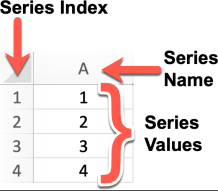
- 一维数组：Series 中的每个元素都有一个对应的索引值。
- 索引： 每个数据元素都可以通过标签（索引）来访问，默认情况下索引是从 0 开始的整数，但你也可以自定义索引。
- 数据类型： Series 可以容纳不同数据类型的元素，包括整数、浮点数、字符串、Python 对象等。
- 大小不变性：Series 的大小在创建后是不变的，但可以通过某些操作（如 append 或 delete）来改变。
- 操作：Series 支持各种操作，如数学运算、统计分析、字符串处理等。
- 缺失数据：Series 可以包含缺失数据，Pandas 使用NaN（Not a Number）来表示缺失或无值。
- 自动对齐：当对多个 Series 进行运算时，Pandas 会自动根据索引对齐数据，这使得数据处理更加高效。

In [3]:
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'], name='num') 
print(s)

a    10
b    20
c    30
Name: num, dtype: int64


In [7]:
# 通过字典方式来创建
s = pd.Series({"a":1, "b":2, "c":3, "d":4, "e":5})
print(s)
s1 = pd.Series(s, index=['a', 'c'])
print(s1)

a    1
b    2
c    3
d    4
e    5
dtype: int64
a    1
c    3
dtype: int64


#### Series的属性
|属性|说明|
|---|----|
|index|Series的索引对象|
|values|值|
|dtype|元素类型|
|shape|形状|
|ndim|维度|
|size|元素个数|
|name|名称|
|loc[]|显式索引，按标签索引或切片|
|iloc[]|隐式索引，按位置索引或切片|
|at[]|使用标签访问单个元素|
|iat[]|使用位置访问单个元素|  

1. 优先使用**loc** **/** **iloc**：直接索引[]的行为可能因索引类型不同而变化，明确场景时建议显式使用loc（标签）或iloc（位置）。
2. 切片差异：
- loc切片为闭区间（包含两端）
- iloc切片为左闭右开（与Python列表一致）
3. 布尔索引：常用于条件过滤，如s[s > 3 & s < 10]。


In [19]:
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print('shape:', s.shape, 'size:', s.size)
# 按位置访问
print(s.iloc[0: 3]) 
print(s.loc['a': 'd'])

shape: (4,) size: 4
a    10
b    20
c    30
dtype: int64
a    10
b    20
c    30
d    40
dtype: int64


#### Series常用方法
| 用途分类 | 方法 | 说明 | 示例代码 |
| :--- | :--- | :--- | :--- |
| **数据预览** | `head()` | 查看前 n 行数据，默认 5 行 | `s.head(3)` |
| **数据预览** | `tail()` | 查看后 n 行数据，默认 5 行 | `s.tail(2)` |
| **条件判断** | `isin()` | 判断元素是否包含在参数集合中 | `s.isin([1, 2])` |
| **缺失值处理** | `isna()` | 判断是否为缺失值（如 NaN 或 None） | `s.isna()` |
| **聚合统计** | `sum()` | 求和，自动忽略缺失值 | `s.sum()` |
| **聚合统计** | `mean()` | 平均值 | `s.mean()` |
| **聚合统计** | `min()` | 最小值 | `s.min()` |
| **聚合统计** | `max()` | 最大值 | `s.max()` |
| **聚合统计** | `var()` | 方差 | `s.var()` |
| **聚合统计** | `std()` | 标准差 | `s.std()` |
| **聚合统计** | `median()` | 中位数 | `s.median()` |
| **聚合统计** | `mode()` | 众数（可返回多个） | `s.mode()` |
| **聚合统计** | `quantile(q)` | 分位数，q 取 0~1 之间 | `s.quantile(0.25)` |
| **聚合统计** | `describe()` | 常见统计信息（count、mean、std、min、25%、50%、75%、max） | `s.describe()` |
| **频率统计** | `value_counts()` | 每个唯一值的出现次数 | `s.value_counts()` |
| **频率统计** | `count()` | 非缺失值数量 | `s.count()` |
| **频率统计** | `nunique()` | 唯一值个数（去重） | `s.nunique()` |
| **唯一处理** | `unique()` | 获取去重后的值数组 | `s.unique()` |
| **唯一处理** | `drop_duplicates()` | 去除重复项 | `s.drop_duplicates()` |
| **抽样分析** | `sample()` | 随机抽样 | `s.sample(2)` |
| **排序操作** | `sort_index()` | 按索引排序 | `s.sort_index()` |
| **排序操作** | `sort_values()` | 按值排序 | `s.sort_values()` |
| **替换值** | `replace()` | 替换值 | `s.replace({1: 100})` |
| **转换结构** | `to_frame()` | 将 Series 转为 DataFrame | `s.to_frame()` |
| **比较判断** | `equals()` | 判断两个 Series 是否完全相等 | `s1.equals(s2)` |
| **信息提取** | `keys()` | 返回 Series 的索引对象 | `s.keys()` |
| **统计关系** | `corr()` | 计算相关系数（默认皮尔逊） | `s1.corr(s2)` |
| **统计关系** | `cov()` | 协方差 | `s1.cov(s2)` |
| **可视化** | `hist()` | 绘制直方图（需安装 matplotlib） | `s.hist()` |
| **遍历操作** | `items()` | 返回索引和值的迭代器 | `for i, v in s.items(): print(i, v)` |

### 实例分析

In [28]:
import pandas as pd
import numpy as np

# 生成随机成绩
np.random.seed(42)
scores = pd.Series(np.random.randint(50, 101, 10))
index = []
for i in range(1, 11):
    index.append(f'student{i}')
scores.index = index
print(scores)

# 计算统计量
mean_score = scores.mean()
min_score = scores.min()
max_score = scores.max()
# 找出高于平均分的学生人数
counts = scores[scores > mean_score].count()
print('mean score:', mean_score)
print(counts)


student1     88
student2     78
student3     64
student4     92
student5     57
student6     70
student7     88
student8     68
student9     72
student10    60
dtype: int32
mean score: 73.7
4


In [42]:
'''给定某城市一周每天的最高温度Series，完成以下任务：
找出温度超过30度的天数
计算平均温度
将温度从高到低排序
找出温度变化最大的两天
'''
temperatures = pd.Series([28, 31, 29, 32, 30, 27, 33], 
                         index=['周一', '周二', '周三', '周四', '周五', '周六', '周日'])
count_days = temperatures[temperatures > 30].count()
print(count_days)
mean_temperature = temperatures.mean()
print('mean:', mean_temperature)
ts = temperatures.sort_values()
print(ts)
wc = 0
differ = 0
for i in range(6):
    di = np.abs(temperatures.iat[i+1] - temperatures.iat[i])
    if di > differ:
        differ = di
        wc = i
print(f'温差最大的两天是周{wc+1}和周{wc+2}')
        
# 计算温差最大的两天
temp_diff = temperatures.diff().abs()
max_diff_days = temp_diff.nlargest(2).tolist()
print(f"温度变化最大的两天: {max_diff_days}")


3
mean: 30.0
周六    27
周一    28
周三    29
周五    30
周二    31
周四    32
周日    33
dtype: int64
温差最大的两天是周6和周7
温度变化最大的两天: [6.0, 3.0]


In [ ]:
'''
某产品过去12个月的销售量Series：
计算季度平均销量（每3个月为一个季度）
找出销量最高的月份
计算月环比增长率
找出连续增长超过2个月的月份
'''
sales = pd.Series([120, 135, 145, 160, 155, 170, 180, 175, 190, 200, 210, 220],
                 index=pd.date_range('2022-01-01', periods=12, freq='M'))
print(sales)
sales_1 = sales.iloc[:3]
mean_1 = sales_1.mean()
sales_2 = sales.iloc[4:7]
mean_2 = sales_2.mean()
sales_3 = sales.iloc[7:10]
mean_3 = sales_3.mean()
sales_4 = sales.iloc[10:13]
mean_4 = sales_4.mean()
means = [mean_1, mean_2, mean_3, mean_4]
# 1. 计算季度平均销量
quarterly_avg = sales.resample('Q').mean()
print("季度平均销量:\n", quarterly_avg)
print(means)

2022-01-31    120
2022-02-28    135
2022-03-31    145
2022-04-30    160
2022-05-31    155
2022-06-30    170
2022-07-31    180
2022-08-31    175
2022-09-30    190
2022-10-31    200
2022-11-30    210
2022-12-31    220
Freq: M, dtype: int64
季度平均销量:
 2022-03-31    133.333333
2022-06-30    161.666667
2022-09-30    181.666667
2022-12-31    210.000000
Freq: Q-DEC, dtype: float64
[133.33333333333334, 168.33333333333334, 188.33333333333334, 215.0]
